In [1]:
from funcs import *

In [2]:
!pip install python-Levenshtein

In [3]:
raw = pd.read_csv('questions.csv')
nlp = spacy.load('en_core_web_lg')

In [4]:
raw.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
len(raw)-len(raw.dropna())

3

In [6]:
raw.dropna(inplace=True)

In [7]:
first_100k_true = raw[raw.is_duplicate==1][:100_000]
first_100k_false = raw[raw.is_duplicate==0][:100_000]

In [8]:
train = first_100k_false.append(first_100k_true)


In [9]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
def prepare(traindf)
    q1 = traindf['question1']
    q2 = traindf['question2']

    q1_it = iter(q1)
    q2_it = iter(q2)

    q1_docs_ = nlp.pipe(q1_it) #nlp.pipe takes an iterator and returns a generator that preforms spacy pipeline 

    q2_docs_ = nlp.pipe(q2_it)
    return zip(q1_docs_,q2_docs_)



In [19]:
y = train.is_duplicate.reset_index(drop=True)

In [11]:
df = parse(docs_gen)


200000it [21:14, 156.98it/s]


NameError: name 'y' is not defined

In [20]:
labeled_df = pd.concat([y,df],axis=1)

In [21]:
X=labeled_df.iloc[:,3:]


In [25]:
feature_sampler(123,df=labeled_df,y=y)

What is the most creative college admissions essay you've read?
Has any college admission officer cried in public while reading an applicant's essay?
0


sim:  0.8815153997090597
sods:  0.75382036

 nouns:
([What, college, admissions, essay], [college, admission, officer, applicant, essay])
posmatchratio: 0.67
sim:  0.8555945
sods:  0.33029985

 verbs:
([is, 've, read], [Has, cried, reading])
posmatchratio: 0.67
sim: 0.78140664
sods:  0.12930234

 adjectives:
([creative], [public])
posmatchratio: 0.33
sim: 0.30363065
sods:  0.30363065

 adverbs:
([most], [])
posmatchratio: 0.0
sim: 0
sods:  0

 propns
([], [])
posmatchscore: 1.0
sim:  0
sods:  0

 ents
([], [])
([], [])
ent match ratio:  1.0
ent type match ratio:  1.0


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [27]:
logreg = LogisticRegression(fit_intercept = False, C = .01,penalty='l2')
logreg_model = logreg.fit(X_train, y_train)
logreg_model
y_hat_train = logreg_model.predict(X_train)
y_hat_test = logreg_model.predict(X_test)


residuals = y_test - y_hat_test
pd.Series(residuals).value_counts()
pd.Series(residuals).value_counts(normalize=True)

print(confusion_matrix(y_test, y_hat_test))

/Users/colemiller1/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[15151  9977]
 [ 7506 17366]]


In [28]:
logreg_model.score(X_test,y_test)

0.65034

In [29]:
from sklearn import linear_model
sgdclf = linear_model.SGDClassifier(loss='hinge',max_iter=1000, tol=1e-3,alpha=.000001,
                                    penalty='elasticnet',l1_ratio=.8)
sgdclf.fit(X_train, y_train)

y_hat_train = sgdclf.predict(X_train)
y_hat_test = sgdclf.predict(X_test)


#y_test_array = np.array(y_test['is_duplicate'])
residuals = y_test - y_hat_test
pd.Series(residuals).value_counts()
pd.Series(residuals).value_counts(normalize=True)
print(confusion_matrix(y_train, y_hat_train))


[[43035 31837]
 [14429 60699]]


In [30]:
sgdclf.score(X_test,y_test)

0.69198

In [32]:
rf_clf = RandomForestClassifier(criterion= 'gini',max_features=2, max_depth= None, min_samples_leaf= 5, min_samples_split= 20, n_estimators= 100)
rf_clf.fit(X_train,y_train)
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X, y, cv=3))
print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))


Mean Cross Validation Score for Random Forest Classifier: 74.32%


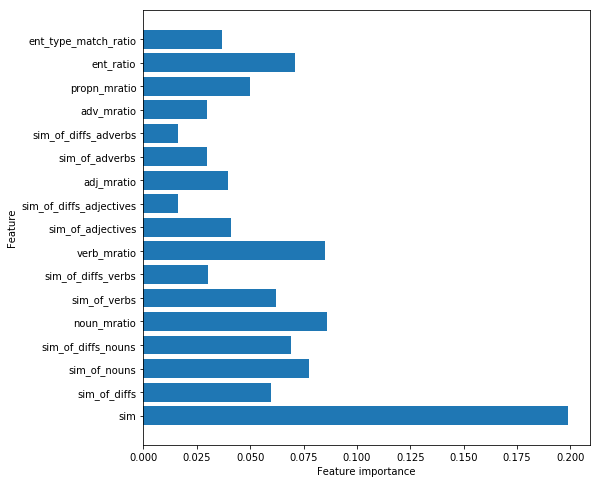

In [33]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rf_clf)


In [ ]:
rf_param_grid = {
    'n_estimators': [100],
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [20,50],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None,2,5]
}

start = time.time()
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X, y)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))


In [35]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=100)
adaclf.fit(X_train,y_train)
mean_rf_cv_score = np.mean(cross_val_score(adaclf_fit, X, y, cv=3))
print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

Mean Cross Validation Score for Random Forest Classifier: 70.79%


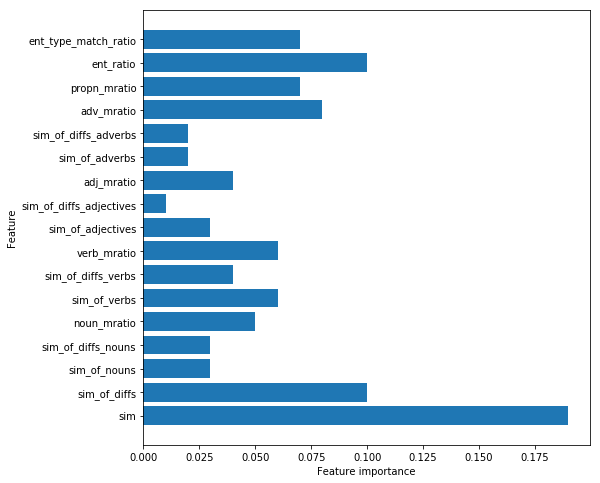

In [36]:
plot_feature_importances(adaclf_fit)

In [50]:
# Your code here
from sklearn.metrics import roc_curve, auc

#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = rf_clf.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = rf_clf.predict(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_test, y_score)


AUC: 0.7455145000153093


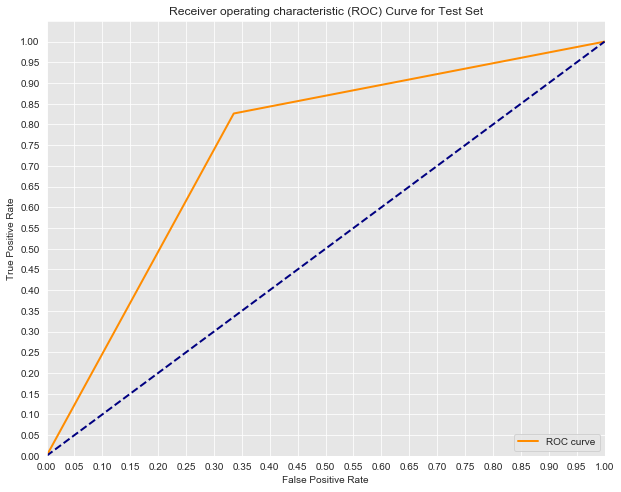

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

In [52]:

y_score = adaclf.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = adaclf.predict(X_train)

train_fpr, train_tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.7093743974242038


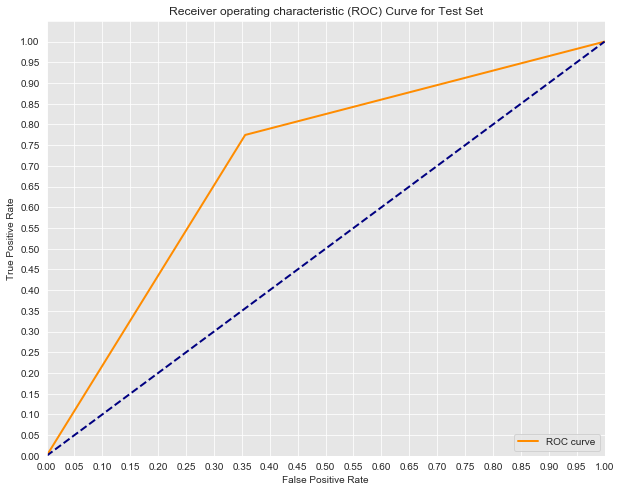

In [53]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()